In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
offense = pd.read_csv('2023_offense.csv')
defense = pd.read_csv('2023_defense.csv')
oline = pd.read_csv('2023_oline.csv')
draft_class = pd.read_csv('2023draft.csv')

In [3]:
offense

,NAME,POS,RTG,TEAM,DEPTH,Wk1,Wk2,Wk3,Wk4,Wk5,...,Wk13,Wk14,Wk15,Wk16,Wk17,Wk18,Total,Avg,TM SNAP %,TD
0,Blaine Gabbert,QB,67,KC,2.0,NaN,NaN,27%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100%,79,39,7.0,NaN
1,Baker Mayfield,QB,80,TB,1.0,100%,100%,100%,100%,NaN,...,100%,100%,100%,100%,100%,100%,1100,64,99.7,29.0
2,Bryce Young,QB,71,CAR,1.0,100%,98%,NaN,100%,99%,...,100%,100%,100%,100%,100%,100%,1068,66,92.8,11.0
3,Bailey Zappe,QB,67,NE,1.0,NaN,NaN,NaN,27%,28%,...,100%,100%,100%,100%,100%,100%,413,41,39.3,7.0
4,C.J. Stroud,QB,79,HOU,1.0,99%,100%,100%,100%,100%,...,97%,86%,NaN,NaN,95%,100%,967,64,85.3,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Tre'Quan Smith,WR,75,DEN,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10,10,14.1,NaN
620,Willie Snead IV,WR,72,SF,NaN,NaN,NaN,NaN,13%,NaN,...,NaN,NaN,NaN,36%,NaN,NaN,47,11,19.1,NaN
621,Zach Ertz,TE,80,ARI,NaN,77%,68%,59%,76%,75%,...,NaN,NaN,NaN,NaN,NaN,NaN,295,42,64.4,1.0
622,Zonovan Knight,RB,71,DET,4.0,NaN,NaN,10%,NaN,3%,...,NaN,NaN,NaN,NaN,NaN,NaN,9,4,4.4,NaN


In [4]:
offense2 = offense.rename(columns={'NAME': 'Player'})

In [5]:
offense2.columns

Index(['Player', 'POS', 'RTG', 'TEAM', 'DEPTH', 'Wk1', 'Wk2', 'Wk3', 'Wk4',
       'Wk5', 'Wk6', 'Wk7', 'Wk8', 'Wk9', 'Wk10', 'Wk11', 'Wk12', 'Wk13',
       'Wk14', 'Wk15', 'Wk16', 'Wk17', 'Wk18', 'Total', 'Avg', 'TM SNAP %',
       'TD'],
      dtype='object')

In [6]:
offense2

,Player,POS,RTG,TEAM,DEPTH,Wk1,Wk2,Wk3,Wk4,Wk5,...,Wk13,Wk14,Wk15,Wk16,Wk17,Wk18,Total,Avg,TM SNAP %,TD
0,Blaine Gabbert,QB,67,KC,2.0,NaN,NaN,27%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100%,79,39,7.0,NaN
1,Baker Mayfield,QB,80,TB,1.0,100%,100%,100%,100%,NaN,...,100%,100%,100%,100%,100%,100%,1100,64,99.7,29.0
2,Bryce Young,QB,71,CAR,1.0,100%,98%,NaN,100%,99%,...,100%,100%,100%,100%,100%,100%,1068,66,92.8,11.0
3,Bailey Zappe,QB,67,NE,1.0,NaN,NaN,NaN,27%,28%,...,100%,100%,100%,100%,100%,100%,413,41,39.3,7.0
4,C.J. Stroud,QB,79,HOU,1.0,99%,100%,100%,100%,100%,...,97%,86%,NaN,NaN,95%,100%,967,64,85.3,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Tre'Quan Smith,WR,75,DEN,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10,10,14.1,NaN
620,Willie Snead IV,WR,72,SF,NaN,NaN,NaN,NaN,13%,NaN,...,NaN,NaN,NaN,36%,NaN,NaN,47,11,19.1,NaN
621,Zach Ertz,TE,80,ARI,NaN,77%,68%,59%,76%,75%,...,NaN,NaN,NaN,NaN,NaN,NaN,295,42,64.4,1.0
622,Zonovan Knight,RB,71,DET,4.0,NaN,NaN,10%,NaN,3%,...,NaN,NaN,NaN,NaN,NaN,NaN,9,4,4.4,NaN


In [7]:
draft_class

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,Att.1,Yds.1,TD.1,Rec,Yds.2,TD.2,Solo,Int.1,Sk,College/Univ
0,1,1,CAR,Bryce Young,QB,22.0,2023.0,0,0,0,...,39.0,253.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Alabama
1,1,2,HOU,C.J. Stroud,QB,21.0,2023.0,0,1,0,...,39.0,167.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN,Ohio St.
2,1,3,HOU,Will Anderson,LB,22.0,2023.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,29.0,NaN,7.0,Alabama
3,1,4,IND,Anthony Richardson,QB,21.0,2023.0,0,0,0,...,25.0,136.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,Florida
4,1,5,SEA,Devon Witherspoon,DB,22.0,2023.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,56.0,1.0,3.0,Illinois
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,7,255,SFO,Jalen Graham,S,22.0,2023.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,Purdue
255,7,256,GNB,Grant Dubose,WR,22.0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Charlotte
256,7,257,DEN,Alex Forsyth,OL,24.0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oregon
257,7,258,CHI,Kendall Williamson,S,23.0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stanford


In [8]:
draft_class.columns

Index(['Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To', 'AP1', 'PB', 'St',
       'wAV', 'DrAV', 'G', 'Cmp', 'Att', 'Yds', 'TD', 'Int', 'Att.1', 'Yds.1',
       'TD.1', 'Rec', 'Yds.2', 'TD.2', 'Solo', 'Int.1', 'Sk', 'College/Univ'],
      dtype='object')

In [9]:
offensive_rookies = pd.merge(offense2, draft_class, on='Player', how='inner')
offensive_rookies

,Player,POS,RTG,TEAM,DEPTH,Wk1,Wk2,Wk3,Wk4,Wk5,...,Att.1,Yds.1,TD.1,Rec,Yds.2,TD.2,Solo,Int.1,Sk,College/Univ
0,Bryce Young,QB,71,CAR,1.0,100%,98%,NaN,100%,99%,...,39.0,253.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Alabama
1,C.J. Stroud,QB,79,HOU,1.0,99%,100%,100%,100%,100%,...,39.0,167.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN,Ohio St.
2,Demario Douglas,WR,76,NE,1.0,41%,8%,24%,33%,13%,...,8.0,41.0,0.0,49.0,561.0,0.0,NaN,NaN,NaN,Liberty
3,Aidan O'Connell,QB,68,LV,1.0,NaN,NaN,NaN,100%,NaN,...,17.0,11.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,Purdue
4,Jordan Addison,WR,83,MIN,1.0,56%,69%,71%,58%,75%,...,1.0,2.0,0.0,70.0,911.0,10.0,NaN,NaN,NaN,USC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Jonathan Mingo,WR,72,CAR,1.0,87%,98%,33%,NaN,86%,...,0.0,0.0,0.0,43.0,418.0,0.0,NaN,NaN,NaN,Mississippi
66,Josh Whyle,TE,67,TEN,2.0,3%,22%,12%,29%,37%,...,0.0,0.0,0.0,9.0,94.0,1.0,1.0,NaN,NaN,Cincinnati
67,Max Duggan,QB,67,LAC,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCU
68,Michael Mayer,TE,75,LV,1.0,49%,40%,47%,51%,66%,...,0.0,0.0,0.0,27.0,304.0,2.0,NaN,NaN,NaN,Notre Dame


In [10]:
offensive_rookies.columns

Index(['Player', 'POS', 'RTG', 'TEAM', 'DEPTH', 'Wk1', 'Wk2', 'Wk3', 'Wk4',
       'Wk5', 'Wk6', 'Wk7', 'Wk8', 'Wk9', 'Wk10', 'Wk11', 'Wk12', 'Wk13',
       'Wk14', 'Wk15', 'Wk16', 'Wk17', 'Wk18', 'Total', 'Avg', 'TM SNAP %',
       'TD_x', 'Rnd', 'Pick', 'Tm', 'Pos', 'Age', 'To', 'AP1', 'PB', 'St',
       'wAV', 'DrAV', 'G', 'Cmp', 'Att', 'Yds', 'TD_y', 'Int', 'Att.1',
       'Yds.1', 'TD.1', 'Rec', 'Yds.2', 'TD.2', 'Solo', 'Int.1', 'Sk',
       'College/Univ'],
      dtype='object')

In [11]:
x = offensive_rookies[['Player', 'POS', 'TEAM', 'Pick', 'TM SNAP %']]
x

,Player,POS,TEAM,Pick,TM SNAP %
0,Bryce Young,QB,CAR,1,92.8
1,C.J. Stroud,QB,HOU,2,85.3
2,Demario Douglas,WR,NE,210,45.8
3,Aidan O'Connell,QB,LV,135,61.3
4,Jordan Addison,WR,MIN,23,82.2
...,...,...,...,...,...
65,Jonathan Mingo,WR,CAR,39,82.8
66,Josh Whyle,TE,TEN,147,16.6
67,Max Duggan,QB,LAC,239,0.0
68,Michael Mayer,TE,LV,35,61.4


In [12]:
defense

,NAME,POS,RTG,TEAM,DEPTH,Wk1,Wk2,Wk3,Wk4,Wk5,...,Wk13,Wk14,Wk15,Wk16,Wk17,Wk18,Total,Avg,TM SNAP %,TD
0,Azeez Al-Shaair,LB,75,TEN,1.0,98%,99%,92%,100%,100%,...,96%,100%,97%,100%,100%,100%,1102,64,95.7,NaN
1,Alex Anzalone,LB,76,DET,1.0,94%,90%,100%,100%,97%,...,NaN,96%,100%,100%,100%,100%,1007,62,92.2,NaN
2,Andre Cisco,S,82,JAX,1.0,100%,88%,100%,83%,100%,...,96%,72%,NaN,51%,76%,100%,848,56,76.3,NaN
3,Alohi Gilman,S,80,LAC,1.0,100%,100%,100%,NaN,NaN,...,100%,100%,95%,100%,100%,100%,928,66,80.6,NaN
4,Antonio Hamilton Sr.,CB,74,ARI,1.0,7%,4%,1%,2%,80%,...,NaN,NaN,100%,100%,100%,100%,559,39,50.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,Will Bradley-King,DE,67,WAS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN
1060,Yannick Ngakoue,DE,72,CHI,NaN,68%,73%,62%,85%,83%,...,NaN,52%,NaN,NaN,NaN,NaN,592,45,72.0,NaN
1061,Zaire Barnes,LB,67,NYJ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN
1062,Zyon Gilbert,CB,67,GB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN


In [13]:
defense2 = defense.rename(columns={'NAME': 'Player'})
defense2

,Player,POS,RTG,TEAM,DEPTH,Wk1,Wk2,Wk3,Wk4,Wk5,...,Wk13,Wk14,Wk15,Wk16,Wk17,Wk18,Total,Avg,TM SNAP %,TD
0,Azeez Al-Shaair,LB,75,TEN,1.0,98%,99%,92%,100%,100%,...,96%,100%,97%,100%,100%,100%,1102,64,95.7,NaN
1,Alex Anzalone,LB,76,DET,1.0,94%,90%,100%,100%,97%,...,NaN,96%,100%,100%,100%,100%,1007,62,92.2,NaN
2,Andre Cisco,S,82,JAX,1.0,100%,88%,100%,83%,100%,...,96%,72%,NaN,51%,76%,100%,848,56,76.3,NaN
3,Alohi Gilman,S,80,LAC,1.0,100%,100%,100%,NaN,NaN,...,100%,100%,95%,100%,100%,100%,928,66,80.6,NaN
4,Antonio Hamilton Sr.,CB,74,ARI,1.0,7%,4%,1%,2%,80%,...,NaN,NaN,100%,100%,100%,100%,559,39,50.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,Will Bradley-King,DE,67,WAS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN
1060,Yannick Ngakoue,DE,72,CHI,NaN,68%,73%,62%,85%,83%,...,NaN,52%,NaN,NaN,NaN,NaN,592,45,72.0,NaN
1061,Zaire Barnes,LB,67,NYJ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN
1062,Zyon Gilbert,CB,67,GB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN


In [14]:
defensive_rookies = pd.merge(defense2, draft_class, on='Player', how='inner')
y = defensive_rookies[['Player', 'POS', 'TEAM', 'Pick', 'TM SNAP %']]
y

,Player,POS,TEAM,Pick,TM SNAP %
0,Joey Porter Jr.,CB,PIT,32,71.5
1,Tyrique Stevenson,CB,CHI,56,77.4
2,Devon Witherspoon,CB,SEA,5,74.3
3,Chamarri Conner,DB,KC,119,27.9
4,Carrington Valentine,CB,GB,232,62.6
...,...,...,...,...,...
95,DJ Ivey,CB,CIN,246,3.3
96,Dante Stills,DT,ARI,213,50.6
97,Mike Morris,DE,SEA,151,17.7
98,Nesta Jade Silvera,DT,LV,231,2.6


In [15]:
oline2 = oline.rename(columns={'NAME': 'Player'})
oline2

,Player,POS,RTG,TEAM,DEPTH,Wk1,Wk2,Wk3,Wk4,Wk5,...,Wk12,Wk13,Wk14,Wk15,Wk16,Wk17,Wk18,Total,Avg,TM SNAP %
0,Aaron Banks,OL,74,SF,1.0,100%,100%,100%,100%,55%,...,100%,100%,100%,100%,93%,NaN,100%,837,55,78.5
1,Aaron Brewer,G,71,TEN,1.0,100%,100%,100%,100%,100%,...,100%,100%,100%,100%,100%,100%,100%,1050,61,100.0
2,Anton Harrison,OT,71,JAX,1.0,100%,100%,70%,100%,100%,...,100%,100%,100%,100%,53%,100%,100%,1113,65,95.5
3,Alaric Jackson,OL,71,LAR,1.0,100%,100%,36%,NaN,100%,...,100%,100%,100%,100%,100%,NaN,100%,969,64,84.4
4,Austin Jackson,OL,74,MIA,1.0,100%,100%,100%,100%,100%,...,89%,100%,100%,48%,NaN,94%,100%,989,61,90.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,Tyler Vrabel,OL,67,ATL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,79%,NaN,NaN,NaN,NaN,57,19,29.8
350,Tyrone Wheatley Jr.,OT,67,NE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0
351,Will Clapp,C,67,LAC,NaN,2%,1%,2%,100%,NaN,...,100%,100%,100%,65%,NaN,NaN,NaN,706,50,75.1
352,Wes Schweitzer,OL,69,NYJ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100%,NaN,NaN,NaN,NaN,NaN,149,24,30.7


In [16]:
oline_rookies = pd.merge(oline2, draft_class, on='Player', how='inner')
oline_rookies

,Player,POS,RTG,TEAM,DEPTH,Wk1,Wk2,Wk3,Wk4,Wk5,...,Att.1,Yds.1,TD.1,Rec,Yds.2,TD.2,Solo,Int.1,Sk,College/Univ
0,Anton Harrison,OT,71,JAX,1.0,100%,100%,70%,100%,100%,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma
1,Broderick Jones,OT,73,PIT,1.0,6%,NaN,NaN,86%,100%,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Georgia
2,Cody Mauch,G,68,TB,1.0,100%,100%,100%,100%,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,North Dakota St.
3,Carter Warren,OT,67,NYJ,1.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Pittsburgh
4,Darnell Wright,OT,76,CHI,1.0,100%,100%,100%,100%,100%,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Tennessee
5,Jake Andrews,C,67,NE,2.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Troy
6,Jordan McFadden,OL,67,LAC,2.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Clemson
7,Juice Scruggs,G,69,HOU,1.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Penn St.
8,Luke Wypler,C,68,CLE,3.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Ohio St.
9,Matthew Bergeron,OL,72,ATL,1.0,100%,100%,100%,100%,100%,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Syracuse


In [17]:
z = oline_rookies[['Player', 'POS', 'TEAM', 'Pick', 'TM SNAP %']]

In [18]:
all_rookies = pd.concat([x, y, z], ignore_index=True)
all_rookies

,Player,POS,TEAM,Pick,TM SNAP %
0,Bryce Young,QB,CAR,1,92.8
1,C.J. Stroud,QB,HOU,2,85.3
2,Demario Douglas,WR,NE,210,45.8
3,Aidan O'Connell,QB,LV,135,61.3
4,Jordan Addison,WR,MIN,23,82.2
...,...,...,...,...,...
196,Chandler Zavala,G,CAR,114,49.1
197,Dawand Jones,OT,CLE,111,73.0
198,Jarrett Patterson,G,HOU,201,99.1
199,Nick Saldiveri,OL,NO,103,2.1


In [19]:
all_rookies['POS'].unique()

array(['QB', 'WR', 'TE', 'RB', 'CB', 'DB', 'S', 'OLB', 'DE', 'DL', 'DT',
       'NT', 'LB', 'ILB', 'OT', 'G', 'C', 'OL'], dtype=object)

In [20]:
all_rookies['TEAM'].unique()

array(['CAR', 'HOU', 'NE', 'LV', 'MIN', 'CIN', 'GB', 'LAC', 'ARI', 'LAR',
       'ATL', 'IND', 'JAX', 'SEA', 'NO', 'CLE', 'MIA', 'PIT', 'SF', 'BUF',
       'DET', 'CHI', 'TB', 'DAL', 'TEN', 'NYG', 'NYJ', 'KC', 'BAL', 'PHI',
       'WAS', 'DEN'], dtype=object)

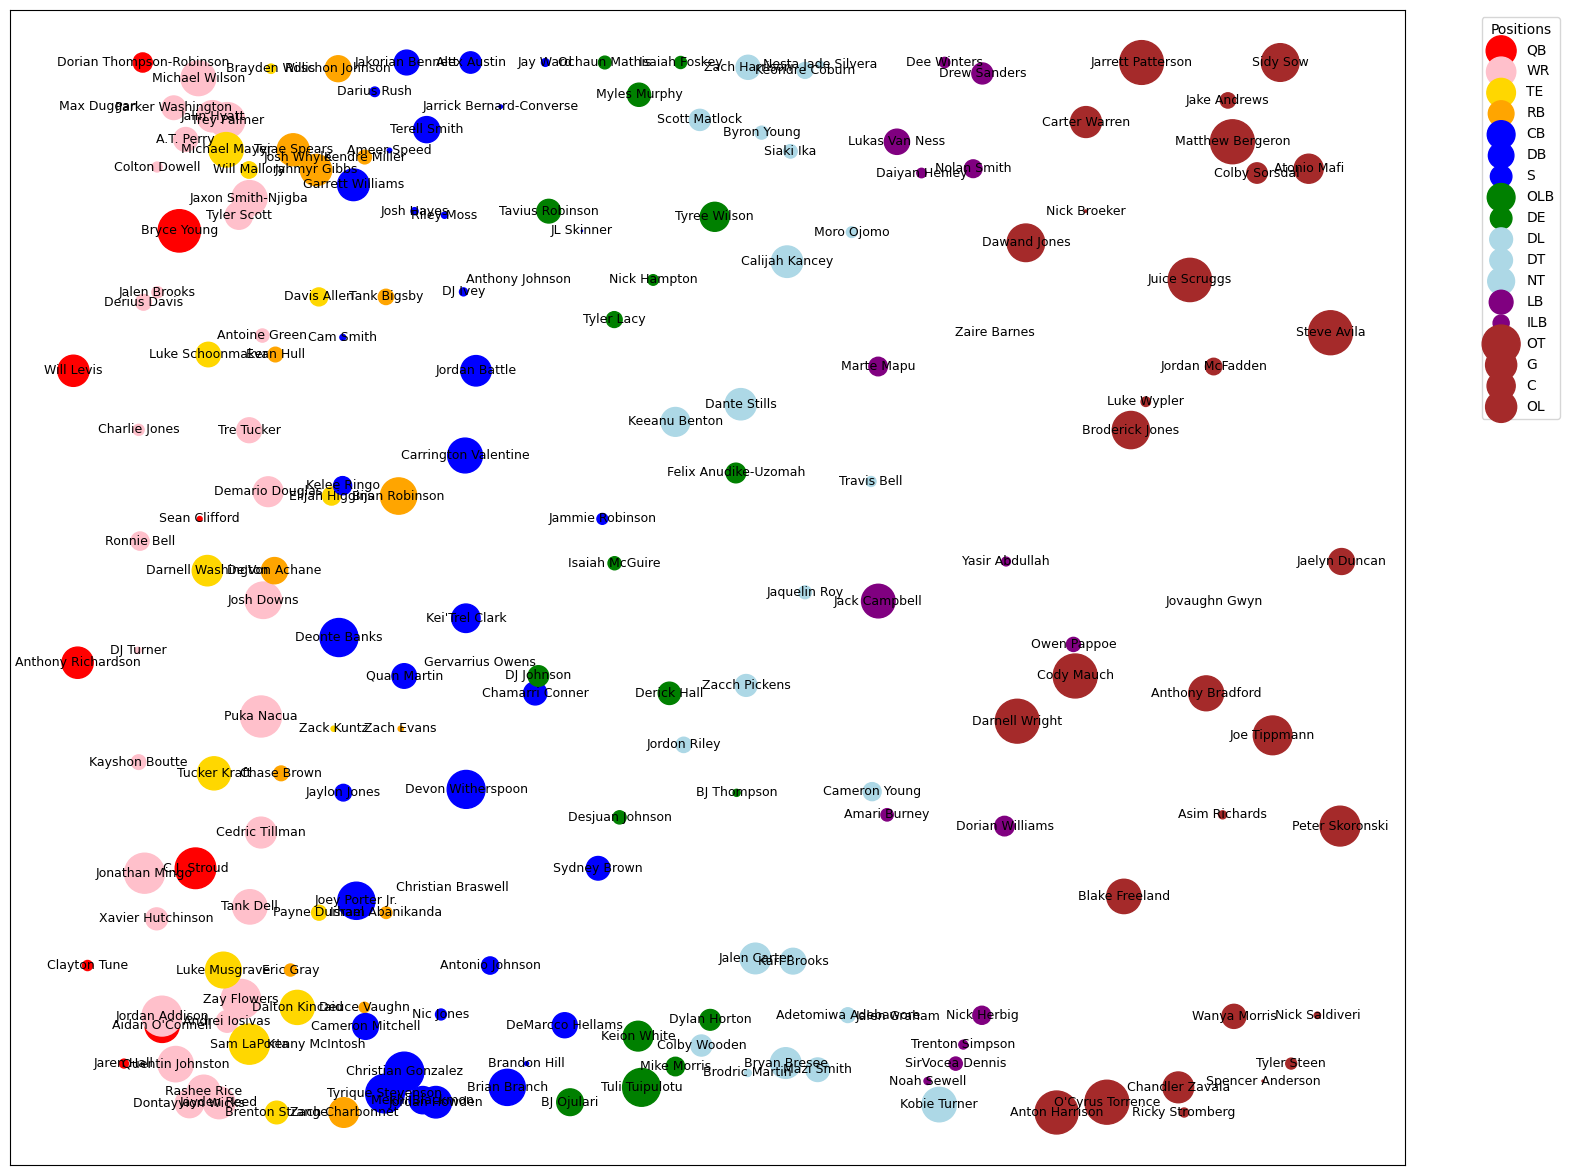

In [21]:
colors = {'QB': 'red', 'WR': 'pink', 'TE': 'gold', 'RB': 'orange', 'CB': 'blue',
          'DB': 'blue', 'S': 'blue', 'OLB': 'green', 'DE': 'green', 'DL': 'lightblue', 'DT': 'lightblue',
          'NT': 'lightblue', 'LB': 'purple', 'ILB': 'purple', 'OT': 'brown', 'G': 'brown', 'C': 'brown',
          'OL': 'brown'}

# Create a DiGraph
G = nx.DiGraph()

# Add nodes with snap percentages as node sizes, color based on position, and group by team
for index, row in all_rookies.iterrows():
    G.add_node(row['Player'], size=row['TM SNAP %'], position=row['POS'], team=row['TEAM'])

# Visualize the graph with node sizes, colors, and group by position using subgraphs
node_sizes = np.array([data['size'] for node, data in G.nodes(data=True)])
node_colors = [colors.get(data['position'], 'gray') for node, data in G.nodes(data=True)]

# Convert the colors list to a dictionary
color_dict = dict(zip([data['position'] for node, data in G.nodes(data=True)], node_colors))

# Scale the node sizes for better visualization
scale_factor = 10  # Adjust the scale factor as needed
scaled_node_sizes = node_sizes * scale_factor

# Set a larger figure size
fig, ax = plt.subplots(figsize=(18, 15))

# Create subgraphs for each position
positions = all_rookies['POS'].unique()
subgraphs = {position: G.subgraph([node for node, data in G.nodes(data=True) if data['position'] == position])
              for position in positions}

# Draw each subgraph with force-directed layout
pos = {}
current_pos = 0
for position, subgraph in subgraphs.items():
    subgraph_pos = nx.spring_layout(subgraph, seed=42)
    # Shift the position of this subgraph in the x-axis
    subgraph_pos = {node: (pos[0] + current_pos, pos[1]) for node, pos in subgraph_pos.items()}
    pos.update(subgraph_pos)
    
    sizes = [subgraph.nodes[node]['size'] * scale_factor for node in subgraph.nodes]
    colors = [color_dict.get(subgraph.nodes[node]['position'], 'gray') for node in subgraph.nodes]
    nx.draw_networkx_nodes(subgraph, pos=pos, node_size=sizes, node_color=colors, label=position)

    edges_within_position = [(node1, node2) for node1, node2 in subgraph.edges() if node1 != node2]
    nx.draw_networkx_edges(subgraph, pos=pos, edgelist=edges_within_position, alpha=0.3)
    
    current_pos += 1  # Increase the position for the next subgraph

# Draw labels
nx.draw_networkx_labels(G, pos=pos, font_size=9, font_color='black')

plt.legend(title='Positions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [22]:
all_rookies

,Player,POS,TEAM,Pick,TM SNAP %
0,Bryce Young,QB,CAR,1,92.8
1,C.J. Stroud,QB,HOU,2,85.3
2,Demario Douglas,WR,NE,210,45.8
3,Aidan O'Connell,QB,LV,135,61.3
4,Jordan Addison,WR,MIN,23,82.2
...,...,...,...,...,...
196,Chandler Zavala,G,CAR,114,49.1
197,Dawand Jones,OT,CLE,111,73.0
198,Jarrett Patterson,G,HOU,201,99.1
199,Nick Saldiveri,OL,NO,103,2.1


In [ ]:
colors = {'QB': 'red', 'WR': 'pink', 'TE': 'gold', 'RB': 'orange', 'CB': 'blue',
          'DB': 'blue', 'S': 'blue', 'OLB': 'green', 'DE': 'green', 'DL': 'lightblue', 'DT': 'lightblue',
          'NT': 'lightblue', 'LB': 'purple', 'ILB': 'purple', 'OT': 'brown', 'G': 'brown', 'C': 'brown',
          'OL': 'brown'}

# Create a DiGraph
G = nx.DiGraph()

# Add nodes with snap percentages as node sizes, color based on position, and group by team
for index, row in all_rookies.iterrows():
    G.add_node(row['Player'], size=row['TM SNAP %'], position=row['POS'], team=row['TEAM'])
    G.add_node(row['TEAM'], size=0, position='central')  # Add central nodes for each team

# Add edges connecting players to their team's central node
for index, row in all_rookies.iterrows():
    G.add_edge(row['TEAM'], row['Player'])

# Visualize the graph with node sizes, colors, and central nodes
node_sizes = np.array([data['size'] for node, data in G.nodes(data=True)])
node_colors = [colors.get(data['position'], 'gray') for node, data in G.nodes(data=True)]

# Convert the colors list to a dictionary
color_dict = dict(zip([data['position'] for node, data in G.nodes(data=True)], node_colors))

# Scale the node sizes for better visualization
scale_factor = 10  # Adjust the scale factor as needed
scaled_node_sizes = node_sizes * scale_factor

# Set a larger figure size
fig, ax = plt.subplots(figsize=(30, 24))

# Create a layout for the graph with increased spacing
pos = nx.spring_layout(G, seed=42, k=0.4)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos=pos, node_size=scaled_node_sizes, node_color=node_colors)
nx.draw_networkx_edges(G, pos=pos, alpha=0.3)

# Draw labels
nx.draw_networkx_labels(G, pos=pos, font_size=9, font_color='black')

# Create a legend based on positions
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=pos,
                             markerfacecolor=color, markersize=10) for pos, color in color_dict.items()]
plt.legend(handles=legend_handles, title='Positions')

plt.show()

In [ ]:
all_rookies = all_rookies.sort_values(by=['TEAM', 'TM SNAP %'], ascending=False)
all_rookies

,Player,POS,TEAM,Pick,TM SNAP %
107,Quan Martin,DB,WAS,47,31.3
200,Ricky Stromberg,C,WAS,97,4.2
181,Peter Skoronski,OL,TEN,11,82.1
37,Tyjae Spears,RB,TEN,81,53.1
58,Will Levis,QB,TEN,33,50.3
...,...,...,...,...,...
153,Kei'Trel Clark,CB,ARI,180,41.9
86,BJ Ojulari,OLB,ARI,41,36.9
31,Elijah Higgins,TE,ARI,197,16.9
103,Owen Pappoe,ILB,ARI,168,10.3


In [34]:
highest_snap_count = all_rookies.sort_values(by='TM SNAP %', ascending=False)
highest_snap_count.head(40)

,Player,POS,TEAM,Pick,TM SNAP %
180,O'Cyrus Torrence,G,BUF,59,100.0
182,Steve Avila,OL,LAR,36,100.0
172,Cody Mauch,G,TB,48,100.0
179,Matthew Bergeron,OL,ATL,38,99.9
174,Darnell Wright,OT,CHI,10,99.6
198,Jarrett Patterson,G,HOU,201,99.1
177,Juice Scruggs,G,HOU,62,96.9
170,Anton Harrison,OT,JAX,27,95.5
0,Bryce Young,QB,CAR,1,92.8
28,Puka Nacua,WR,LAR,177,87.1


In [33]:
all_rookies['TEAM'].value_counts()

GB     10
LV     10
LAR    10
NE      9
ARI     8
CHI     8
SEA     8
HOU     8
IND     8
JAX     8
TEN     7
CIN     7
PIT     7
CLE     7
DET     7
LAC     7
KC      6
NO      6
NYJ     6
PHI     6
TB      6
MIN     5
NYG     5
DAL     5
CAR     5
ATL     5
SF      4
DEN     3
BUF     3
BAL     3
MIA     2
WAS     2
Name: TEAM, dtype: int64